# Credit Card Fraud Detection
---

**Motivation** <br />


In order to prevent customers from being charged for products they did not buy, credit card firms must be able to identify fraudulent credit card transactions.


## Table of Contents
--------------------

- Reading the Data
- Data Preprocessing (Clean up )
- EDA ( Exploratory Data Analysis )
- Dimensionality Reduction ( using Techniques like PCA )
- Generate Classification model
- Hyper parameter tuning 
- Results ( Accuracy, confusion matrix, f1 Score, precision and AUROC )

## Importing Libraries
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## import scikit learn modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score



## Data Cleanup
---

Lets read the data and cleanup the data for any missing values and other irregularities

In [102]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Lets check for the missing values within the dataset and also check the datatypes of each columns

In [3]:
print("The datatypes of each column are ")
data.info(  )

The datatypes of each column are 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807

Checking the null values in data

In [4]:

numMissingValues  = data.isnull().sum().sum()
print("The number of missing values in the dataset is ", numMissingValues)

The number of missing values in the dataset is  0


## Exploratory Data Analysis
---

In this section we will visualise the distribution of classes and other aspects in the given dataset

### Distribution of classes


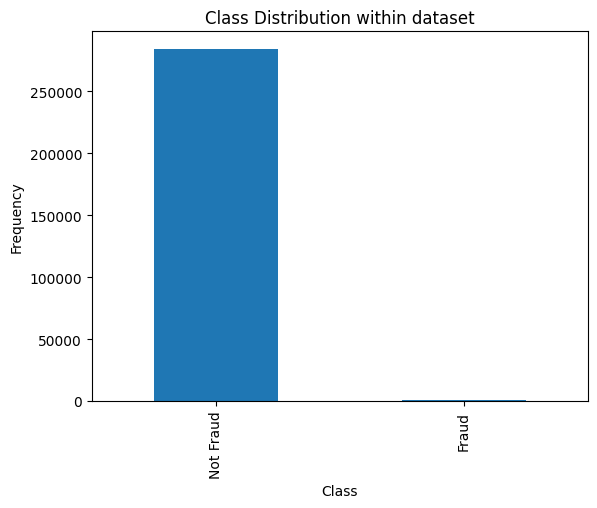

<Figure size 640x480 with 0 Axes>

In [5]:
axes = data["Class"].value_counts().plot(kind="bar")
axes.set_title("Class Distribution within dataset")
axes.set_xlabel("Class")
axes.set_ylabel("Frequency")
axes.set_xticklabels(["Not Fraud", "Fraud"])
plt.show()
plt.savefig("ClassDistributionInbalanced.png")

### Distribution of Input Features


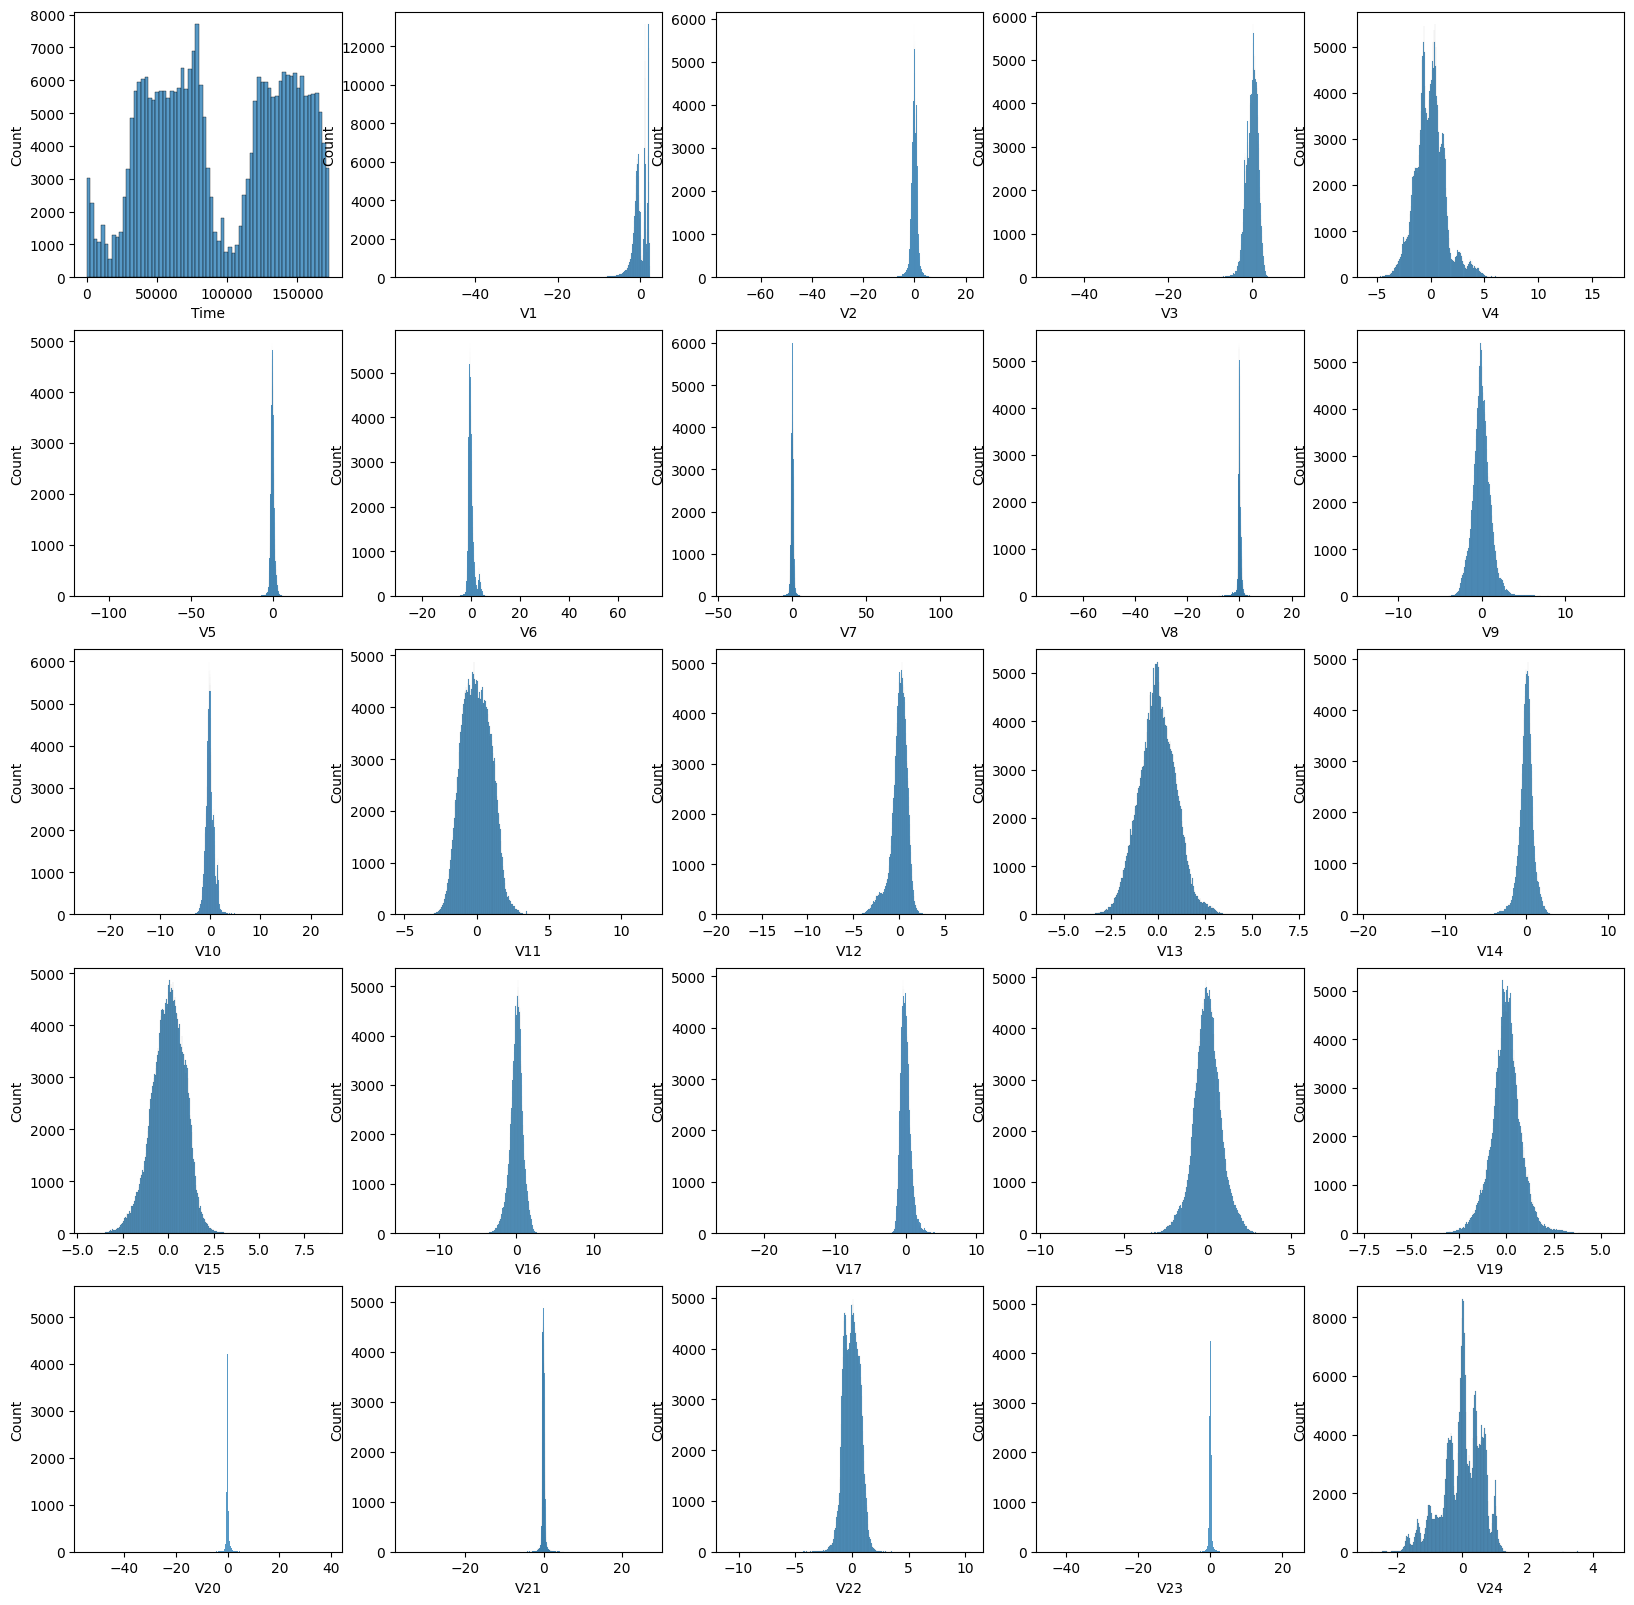

In [6]:
## create a 5 * 5 grid of subplots and plot the histograms of each column
fig, ax = plt.subplots(5, 5, figsize=(20, 20))
for variable, subplot in zip(data.columns, ax.flatten()):
    givenData = data[variable]
    plotterObject = subplot
    sns.histplot(givenData, ax=plotterObject)
plt.savefig("HistogramsAllColumns.png")
plt.show()


### Balancing the imbalance Dataset

We can observe that the dataset that we are using is not balanced, so we will use the undersamling technique to get the reduced dataframe size where the classes can be balanced

The number of fraud cases in the dataset is  492
The shape of the undersampled dataset is  (984, 31)


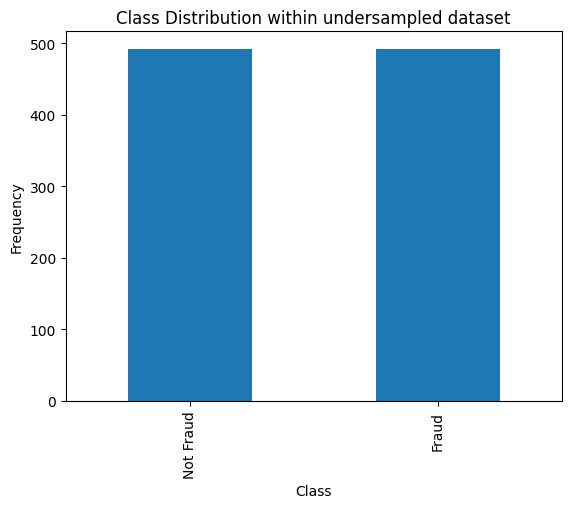

In [104]:
## perform undersampling on the dataset

## get the number of fraud cases
numFraudCases = data["Class"].value_counts()[1]
print("The number of fraud cases in the dataset is ", numFraudCases)

## get the indices of the fraud cases
indicesFraudCases = data[data["Class"] == 1].index

## get the indices of the non-fraud cases
indicesNonFraudCases = data[data["Class"] == 0].index

## get the indices of the non-fraud cases to be used for undersampling
indicesNonFraudCasesToBeUsed = np.random.choice(indicesNonFraudCases, numFraudCases, replace=False)

## get the indices of the fraud cases to be used for undersampling
indicesFraudCasesToBeUsed = indicesFraudCases

## get the indices of the undersampled dataset
indicesUndersampledDataset = np.concatenate([indicesNonFraudCasesToBeUsed, indicesFraudCasesToBeUsed])

## get the undersampled dataset
undersampledDataset = data.loc[indicesUndersampledDataset]
print("The shape of the undersampled dataset is ", undersampledDataset.shape)

## plot the class distribution of the undersampled dataset
axes = undersampledDataset["Class"].value_counts().plot(kind="bar")
axes.set_title("Class Distribution within undersampled dataset")
axes.set_xlabel("Class")
axes.set_ylabel("Frequency")
axes.set_xticklabels(["Not Fraud", "Fraud"])
plt.savefig("ClassDistributionUndersampled.png")
plt.show()


### Removal of Outliers 
---

Lets visualise the outliers in all the columns using the box plot.

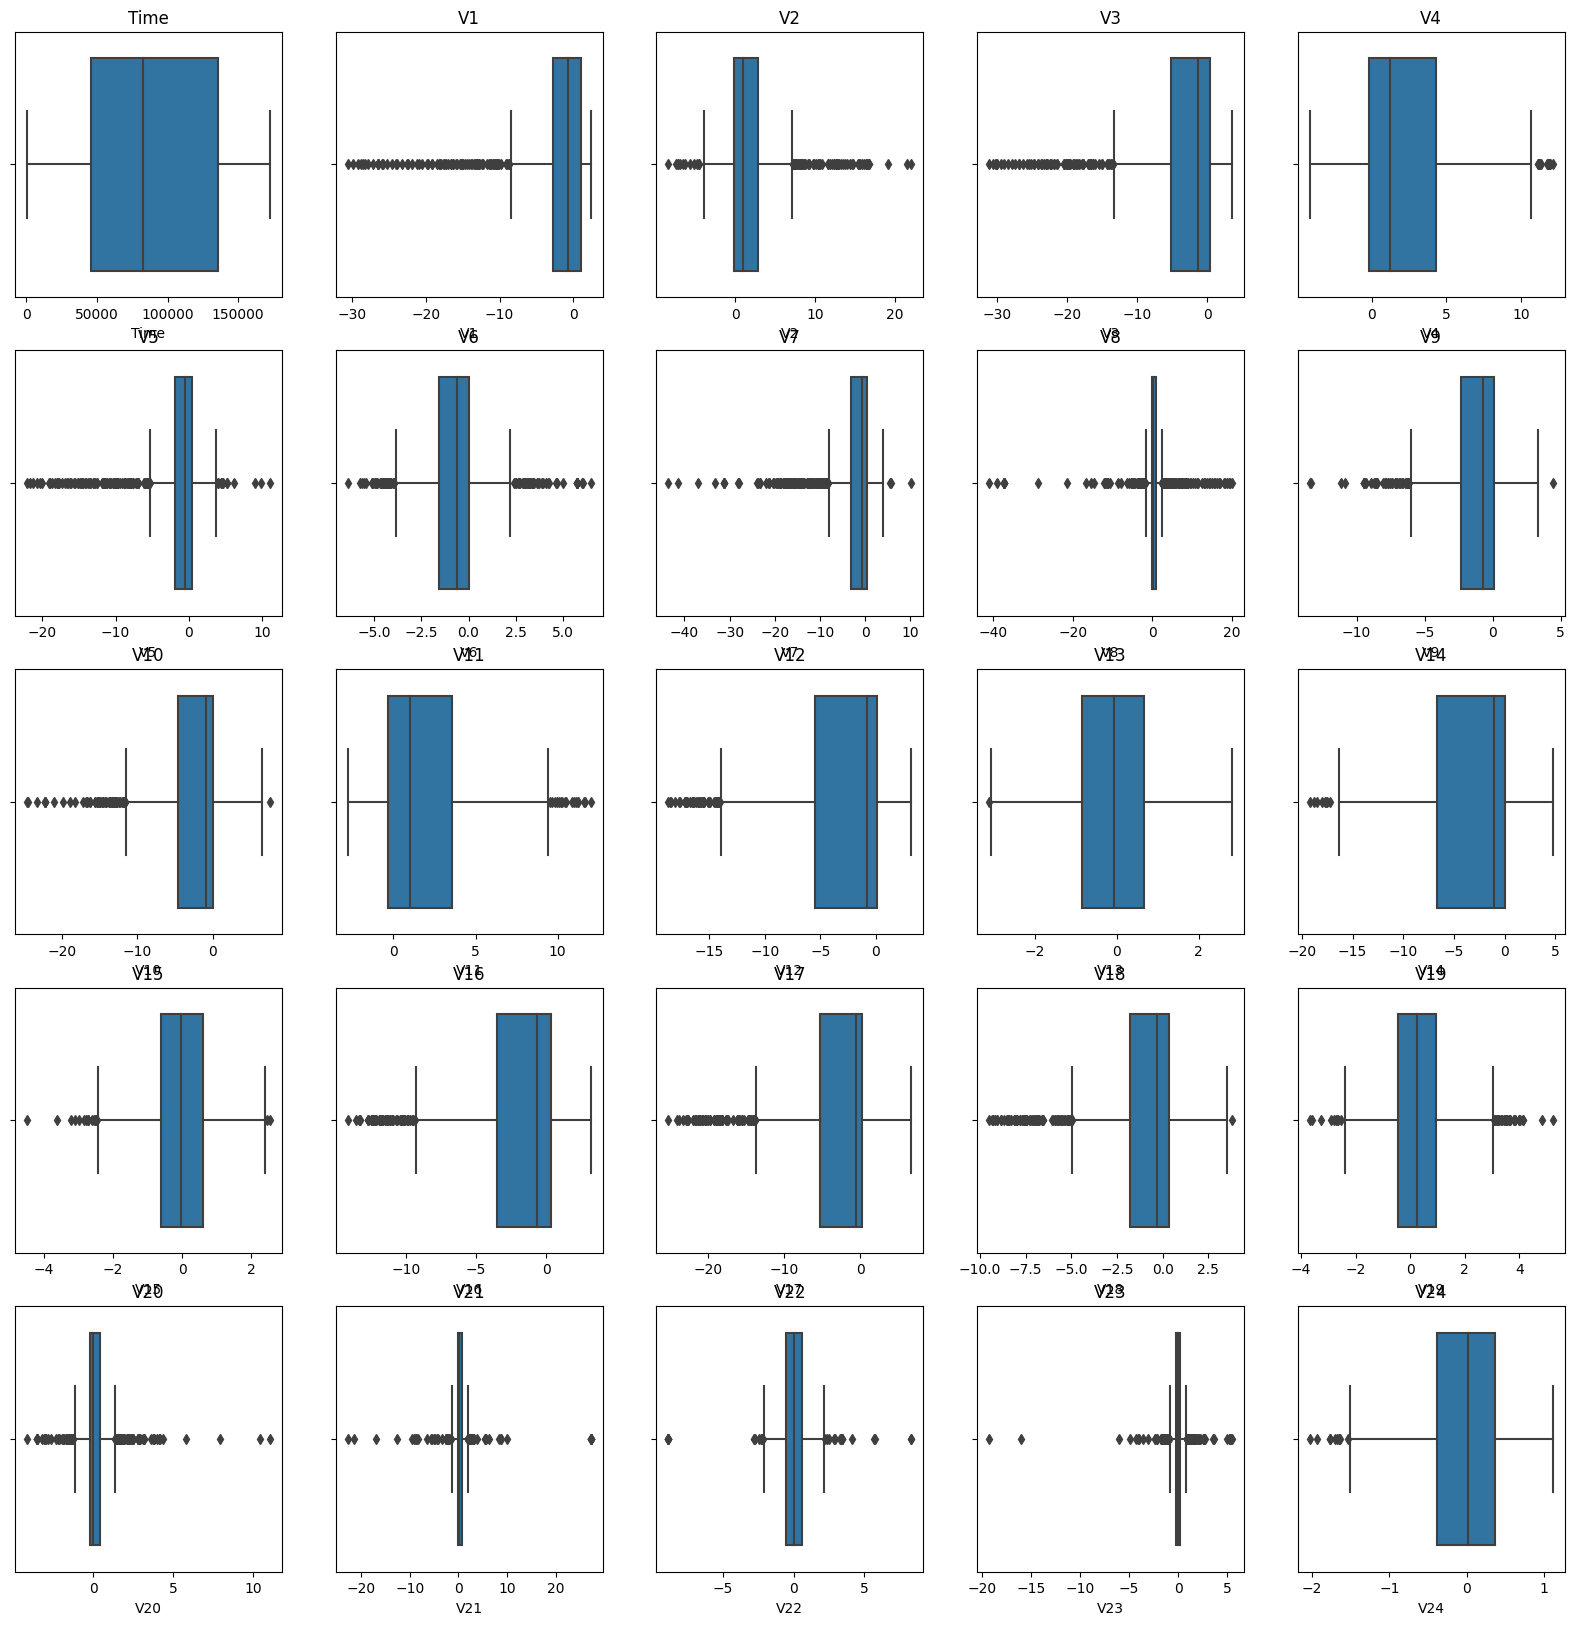

In [8]:
fig, ax = plt.subplots(5, 5, figsize=(20, 20))
for variable, subplot in zip(undersampledDataset.columns, ax.flatten()):
    sns.boxplot( data = undersampledDataset, x = variable, ax = subplot)
    subplot.set_title(variable)
plt.savefig("BoxplotsAllColumns.png")
plt.show()


To remove the outliers, lets use the IQR (interquartile range) as metric to remove outliers in current data

In [27]:
## remove the time column
undersampledDataset = undersampledDataset.copy()
undersampledDataset = undersampledDataset.drop("Time", axis=1)



The number of rows that do not have outliers is  812
The shape of the dataset without outliers is  (812, 31)
Number of Outliers removed in the dataset is  172


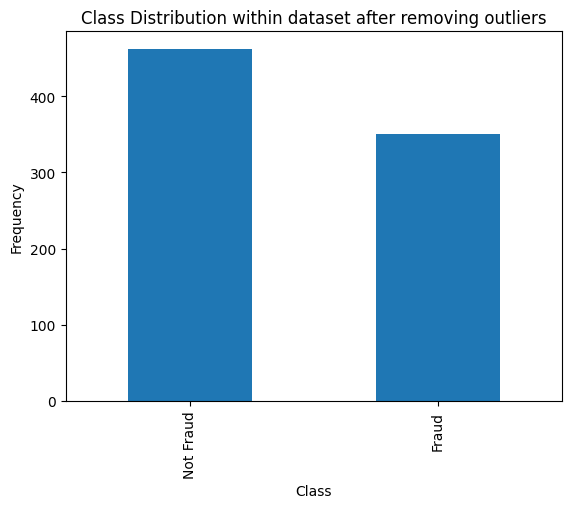

In [32]:

## remove the outliers rows from the dataset using the interquartile range
Q1 = undersampledDataset.quantile(0.25)
Q3 = undersampledDataset.quantile(0.75)
IQR = Q3 - Q1

RangeForOutliers = 4.5 * IQR
## get the indices of the rows that do not have outliers
indicesRowsWithoutOutliers = ((undersampledDataset < (Q1 - RangeForOutliers)) | (undersampledDataset > (Q3 + RangeForOutliers))).sum(axis=1) == 0

print("The number of rows that do not have outliers is ", indicesRowsWithoutOutliers.sum())

## get the dataset without outliers
datasetWithoutOutliers = undersampledDataset[indicesRowsWithoutOutliers]

print("The shape of the dataset without outliers is ", datasetWithoutOutliers.shape)
print("Number of Outliers removed in the dataset is ", undersampledDataset.shape[0] - datasetWithoutOutliers.shape[0])

## PLot the distribution of the classes in the dataset without outliers
axes = datasetWithoutOutliers["Class"].value_counts().plot(kind="bar")
axes.set_title("Class Distribution within dataset after removing outliers")
axes.set_xlabel("Class")
axes.set_ylabel("Frequency")
axes.set_xticklabels(["Not Fraud", "Fraud"])
plt.savefig("ClassDistributionInbalancedWithoutOutliers.png")
plt.show()


### Scaling the data

We will scale the data for better prediction results

In [70]:
## Scale the data using Robust Scaler

from sklearn.preprocessing import RobustScaler

## get the features
features = datasetWithoutOutliers.drop("Class", axis=1)
## get the labels
labels = datasetWithoutOutliers["Class"]

## scale the features
scaler = RobustScaler()
X_main = scaler.fit_transform(features)
Y_main = np.array(labels)

## Dimensionality Reduction
---

We will use the t-SNE fit to get the reduced number of input featues, which can distinguish the feature well. 

In [71]:
## use tsne fit transform to reduce the dimensionality of the data
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_main = tsne.fit_transform(X_main)


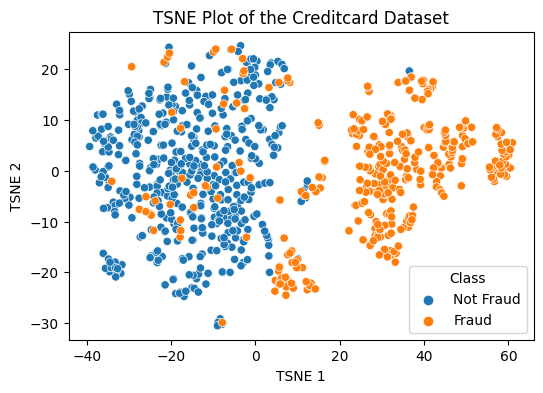

In [79]:
## plot the data
xdf = pd.DataFrame(X_main)
xdf["Class"] = Y_main

## replace the 0s with "Not Fraud" and 1s with "Fraud"
xdf["Class"] = xdf["Class"].replace(0, "Not Fraud")
xdf["Class"] = xdf["Class"].replace(1, "Fraud")

plt.figure(figsize=(6, 4))
sns.scatterplot(data=xdf,x=0,y=1,hue="Class")
plt.title("TSNE Plot of the Creditcard Dataset")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.savefig("TSNEPlot.png")
plt.show()

## Model Generation
---

In [84]:
## we will generate three different models and compare them using the GRID SEARCH CV
## 1. Logistic Regression
## 2. Random Forest
## 3. XGBoost

## split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_main, Y_main, test_size=0.2, random_state=42)

## import the required modules

from sklearn.model_selection import GridSearchCV

print("LOGISTIC REGRESSION")
print("###################")

## define the parameters for the grid search
parametersLR = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"]
}

## define the model
modelLR = LogisticRegression()

## define the grid search

gridSearchLR = GridSearchCV(modelLR, parametersLR, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)

## fit the model
gridSearchLR.fit(X_main, Y_main)

## get the best parameters
bestParametersLR = gridSearchLR.best_params_

print("The best parameters for the model are ", bestParametersLR)
print("The best score for the model is ", gridSearchLR.best_score_)





LOGISTIC REGRESSION
###################
Fitting 5 folds for each of 28 candidates, totalling 140 fits
The best parameters for the model are  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
The best score for the model is  0.9273574187684617


In [87]:
print("RANDOM FOREST")
print("############")

## define the parameters for the grid search
parametersRF = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2,5]
}

# import random forest classifier
from sklearn.ensemble import RandomForestClassifier


## define the model
modelRF = RandomForestClassifier()

## define the grid search

gridSearchRF = GridSearchCV(modelRF, parametersRF, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)

## fit the model
gridSearchRF.fit(X_main, Y_main)

## get the best parameters
bestParametersRF = gridSearchRF.best_params_

print("The best parameters for the model are ", bestParametersRF)
print("The best score for the model is ", gridSearchRF.best_score_)


RANDOM FOREST
############
Fitting 5 folds for each of 36 candidates, totalling 180 fits
The best parameters for the model are  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
The best score for the model is  0.9310308263273498


In [89]:
print("XGBOOST")
print("#######")

## define the parameters for the grid search for XGBoost with only three main hyper parameters



param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.7, 0.8, 0.9]
}

## import the XGBoost Classifier
from xgboost import XGBClassifier

## define the model
modelXGB = XGBClassifier()

## define the grid search

gridSearchXGB = GridSearchCV(modelXGB, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)

## fit the model
gridSearchXGB.fit(X_main, Y_main)

## get the best parameters
bestParametersXGB = gridSearchXGB.best_params_

print("The best parameters for the model are ", bestParametersXGB)
print("The best score for the model is ", gridSearchXGB.best_score_)

XGBOOST
#######
Fitting 5 folds for each of 64 candidates, totalling 320 fits
The best parameters for the model are  {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.9}
The best score for the model is  0.9273271226236461


Summary of the best models
#########################
Accuracy of the best Logistic Regression model is  0.9273574187684617
Accuracy of the best Random Forest model is  0.9310308263273498
Accuracy of the best XGBoost model is  0.9273271226236461


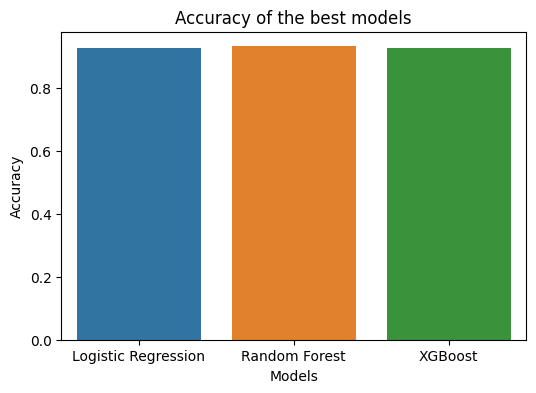

In [91]:
print("Summary of the best models")
print("#########################")

## accuracy of the best models
print("Accuracy of the best Logistic Regression model is ", gridSearchLR.best_score_)
print("Accuracy of the best Random Forest model is ", gridSearchRF.best_score_)
print("Accuracy of the best XGBoost model is ", gridSearchXGB.best_score_)

## plot the accuracies of the best models
accuracies = [gridSearchLR.best_score_, gridSearchRF.best_score_, gridSearchXGB.best_score_]
models = ["Logistic Regression", "Random Forest", "XGBoost"]
plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies)
plt.title("Accuracy of the best models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.savefig("AccuracyOfBestModels.png")
plt.show()


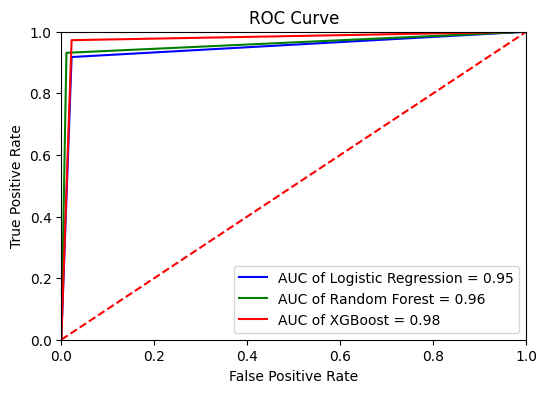

In [92]:
## plot the ROC curves of the best models
from sklearn.metrics import roc_curve, auc

## get the predictions of the best models
predictionsLR = gridSearchLR.predict(X_test)
predictionsRF = gridSearchRF.predict(X_test)
predictionsXGB = gridSearchXGB.predict(X_test)

## get the false positive rate, true positive rate and the threshold for the best logistic regression model
fprLR, tprLR, thresholdLR = roc_curve(Y_test, predictionsLR)
roc_aucLR = auc(fprLR, tprLR)

## get the false positive rate, true positive rate and the threshold for the best random forest model
fprRF, tprRF, thresholdRF = roc_curve(Y_test, predictionsRF)
roc_aucRF = auc(fprRF, tprRF)

## get the false positive rate, true positive rate and the threshold for the best XGBoost model
fprXGB, tprXGB, thresholdXGB = roc_curve(Y_test, predictionsXGB)
roc_aucXGB = auc(fprXGB, tprXGB)

## plot the ROC curves
plt.figure(figsize=(6, 4))
plt.title("ROC Curve")

plt.plot(fprLR, tprLR, "b", label="AUC of Logistic Regression = %0.2f" % roc_aucLR)
plt.plot(fprRF, tprRF, "g", label="AUC of Random Forest = %0.2f" % roc_aucRF)
plt.plot(fprXGB, tprXGB, "r", label="AUC of XGBoost = %0.2f" % roc_aucXGB)

plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.savefig("ROC.png")
plt.show()


In [93]:
## print the classification report of the best models

from sklearn.metrics import classification_report

print("Classification Report of the best Logistic Regression model")
print("###########################################################")
print(classification_report(Y_test, predictionsLR))

print("Classification Report of the best Random Forest model")
print("######################################################")
print(classification_report(Y_test, predictionsRF))

print("Classification Report of the best XGBoost model")
print("################################################")
print(classification_report(Y_test, predictionsXGB))


Classification Report of the best Logistic Regression model
###########################################################
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        90
           1       0.97      0.92      0.94        73

    accuracy                           0.95       163
   macro avg       0.95      0.95      0.95       163
weighted avg       0.95      0.95      0.95       163

Classification Report of the best Random Forest model
######################################################
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.99      0.93      0.96        73

    accuracy                           0.96       163
   macro avg       0.97      0.96      0.96       163
weighted avg       0.96      0.96      0.96       163

Classification Report of the best XGBoost model
################################################
              precis

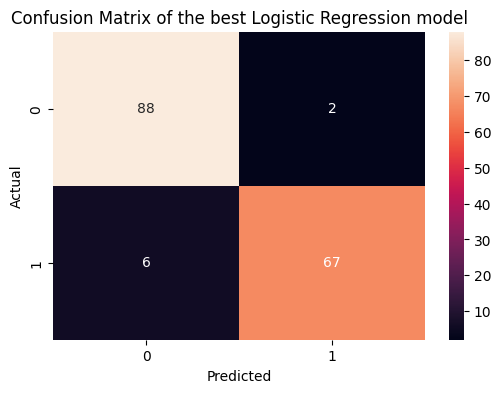

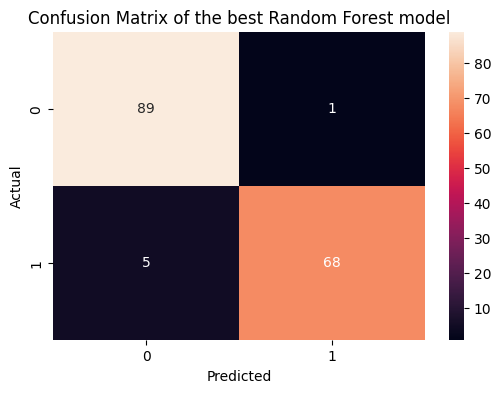

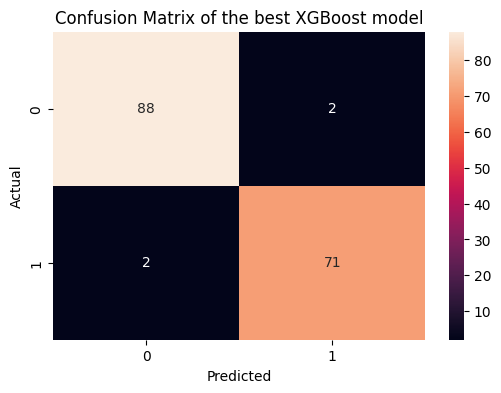

In [94]:
## plot the confusion matrix of the best models

from sklearn.metrics import confusion_matrix

## confusion matrix of the best logistic regression model
cmLR = confusion_matrix(Y_test, predictionsLR)
plt.figure(figsize=(6, 4))
sns.heatmap(cmLR, annot=True, fmt="d")
plt.title("Confusion Matrix of the best Logistic Regression model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("ConfusionMatrixLR.png")
plt.show()

## confusion matrix of the best random forest model
cmRF = confusion_matrix(Y_test, predictionsRF)
plt.figure(figsize=(6, 4))
sns.heatmap(cmRF, annot=True, fmt="d")
plt.title("Confusion Matrix of the best Random Forest model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("ConfusionMatrixRF.png")
plt.show()

## confusion matrix of the best XGBoost model
cmXGB = confusion_matrix(Y_test, predictionsXGB)
plt.figure(figsize=(6, 4))
sns.heatmap(cmXGB, annot=True, fmt="d")
plt.title("Confusion Matrix of the best XGBoost model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("ConfusionMatrixXGB.png")
plt.show()


In [98]:
## plot the f1 score, precision and recall of the best models as a bar plot

from sklearn.metrics import f1_score, precision_score, recall_score

## get the f1 score, precision and recall of the best logistic regression model
f1LR = f1_score(Y_test, predictionsLR)


## get the f1 score, precision and recall of the best random forest model
f1RF = f1_score(Y_test, predictionsRF)


## get the f1 score, precision and recall of the best XGBoost model
f1XGB = f1_score(Y_test, predictionsXGB)




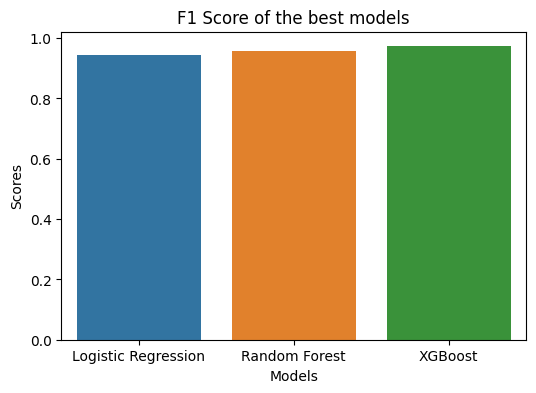

In [100]:
## plot the f1 score, precision and recall of the best models as a bar plot
f1Scores = [f1LR, f1RF, f1XGB]

models = ["Logistic Regression", "Random Forest", "XGBoost"]
fig,ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=models, y=f1Scores, label="F1 Score",ax=ax)
plt.title("F1 Score of the best models")
plt.xlabel("Models")
plt.ylabel("Scores")
plt.savefig("F1ScorePrecisionRecall.png")
plt.show()
